In [4]:
!pip install qutip

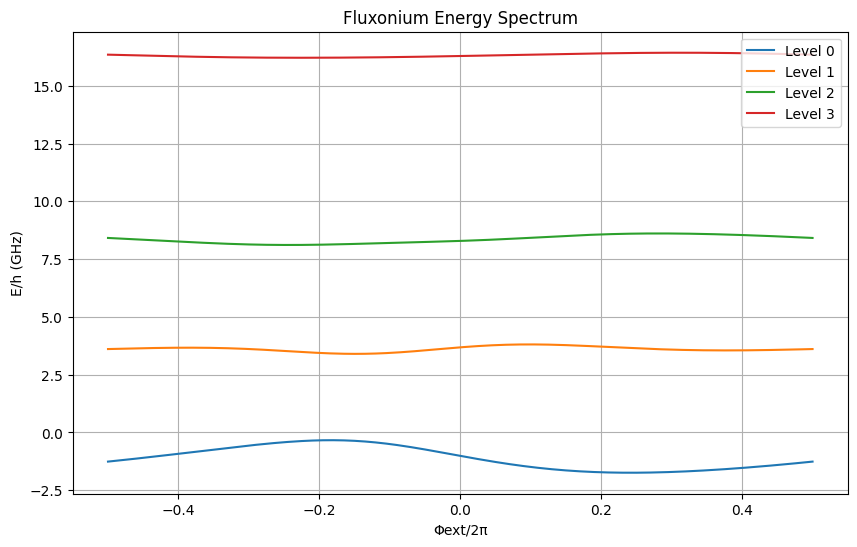

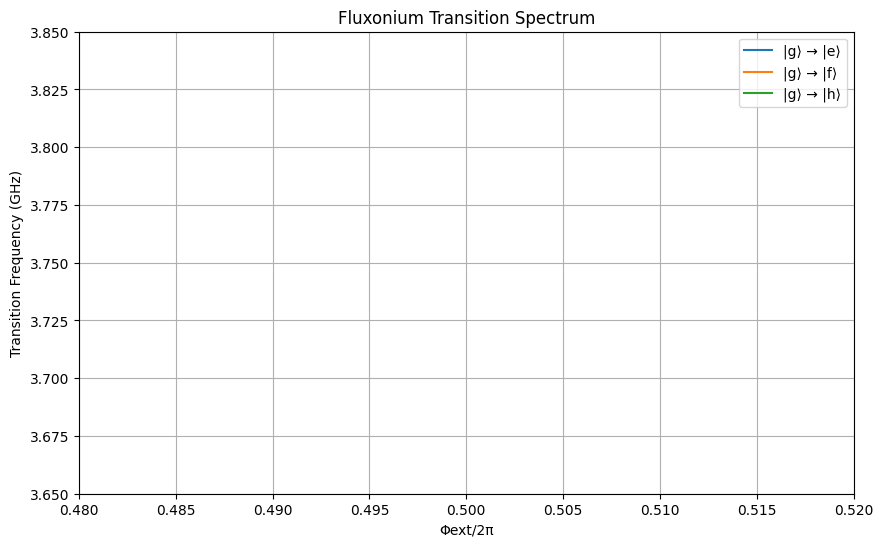

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# Parameters (in GHz)
EJ = 5.178
EC = 0.4144
EL = 0.18

# Number of basis states to use in the simulation
N = 50

# Create operators
n = qt.num(N)  # Number operator
phi = qt.phase(N)  # Phase operator

# Create array of external flux values
phi_ext = np.linspace(-0.5, 0.5, 201) * 2 * np.pi

# Arrays to store eigenvalues
energies = np.zeros((len(phi_ext), 4))  # Store first 4 energy levels

# Calculate eigenvalues for each flux point
for idx, flux in enumerate(phi_ext):
    # Construct Hamiltonian
    H = -EJ * (phi - flux).cosm() + 4 * EC * n**2 + (EL/2) * phi**2

    # Find eigenvalues
    eigenvals = H.eigenenergies(eigvals=4)

    # Store energies
    energies[idx] = eigenvals

# Plot results
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(phi_ext/(2*np.pi), energies[:, i], label=f'Level {i}')

plt.xlabel('Φext/2π')
plt.ylabel('E/h (GHz)')
plt.title('Fluxonium Energy Spectrum')
plt.legend()
plt.grid(True)
plt.show()

# Calculate transition frequencies
transitions = np.zeros((len(phi_ext), 3))
transitions[:, 0] = energies[:, 1] - energies[:, 0]  # |g⟩ → |e⟩
transitions[:, 1] = energies[:, 2] - energies[:, 0]  # |g⟩ → |f⟩
transitions[:, 2] = energies[:, 3] - energies[:, 0]  # |g⟩ → |h⟩

# Plot transition frequencies
plt.figure(figsize=(10, 6))
plt.plot(phi_ext/(2*np.pi), transitions[:, 0], label='|g⟩ → |e⟩')
plt.plot(phi_ext/(2*np.pi), transitions[:, 1], label='|g⟩ → |f⟩')
plt.plot(phi_ext/(2*np.pi), transitions[:, 2], label='|g⟩ → |h⟩')

plt.xlabel('Φext/2π')
plt.ylabel('Transition Frequency (GHz)')
plt.title('Fluxonium Transition Spectrum')
plt.legend()
plt.grid(True)
plt.xlim(0.48, 0.52)
plt.ylim(3.65, 3.85)
plt.show()